In [1]:
# This code analyzes the simulation results in ../outputs/OAL/ folder and plots Figure 3 and Supplementary Figure 11.

In [2]:
import serial
import time
import threading
import matplotlib.pyplot as plt
import os
import platform
import psutil
import csv
import numpy as np
import pandas as pd
import random
import seaborn as sns
import statistics
import math
from matplotlib.ticker import ScalarFormatter

In [3]:
import pickle
def readdata(filename):
    f = open(filename,"rb")
    gw0 = pickle.load(f)
    return gw0

folder="../outputs/OAL/"
MBONa3=readdata(folder+"0/MBONa3.txt")
MBONa1=readdata(folder+"0/MBONa1.txt")
ON=readdata(folder+"0/ON.txt")
spikes_x=readdata(folder+"0/spikes_x.txt")
spikes_y=readdata(folder+"0/spikes_y.txt")
PN_u=readdata(folder+"0/PN_u.txt")

In [4]:
P=6
duration=5
LN_max=191
PN_max=312
KC_max=2231
iteration=10
epoch=10
homeostasis_duration=300
NUM=0
tmax=4300

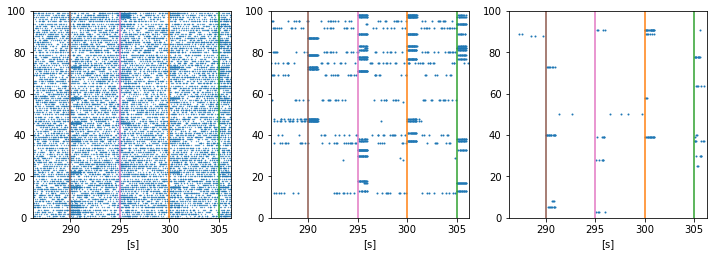

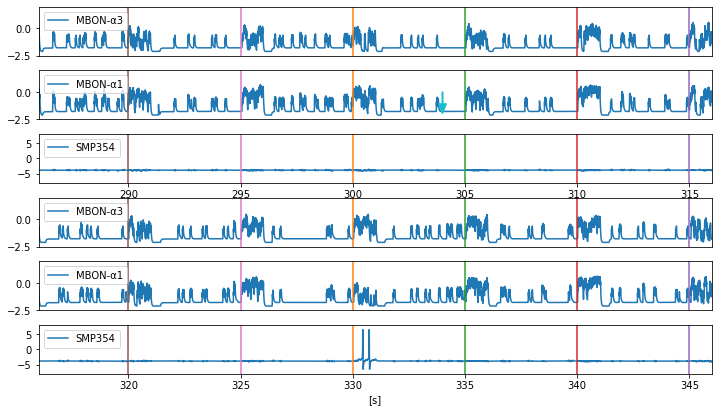

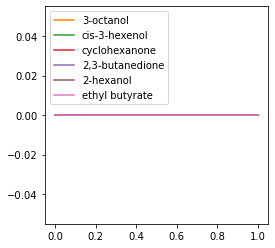

In [5]:
def plot_scatter(ax,rx,ry,xlim_min,xlim_max,ylim_min,ylim_max):
    rx2=[]
    ry2=[]
    for i,x in enumerate(rx):
        if x>=xlim_min and x<xlim_max:
            if ry[i]>=ylim_min and ry[i]<ylim_max:
                rx2.append(x)
                ry2.append(ry[i]-ylim_min)
    ax.scatter(rx2, ry2, s=1)
    ax.set_ylim(0,ylim_max-ylim_min)
    ax.set_xlim(xlim_min,xlim_max)
    for j in range(int(tmax/5)):
        ax.plot([5*j,5*j],[0,ylim_max-ylim_min],color=cmap(j%P+1))
    return rx2,ry2
def plot_scatter_ORN_data(file,ax,xlim_min,xlim_max,ylim_min,ylim_max):
    d0=pd.read_csv(file)
    d0=d0.values.tolist()
    rx=[]
    ry=[]
    for d in d0:
        if d[0]>=xlim_min and d[0]<xlim_max:
            if d[1]>=ylim_min and d[1]<ylim_max:
                rx.append(d[0])
                ry.append(d[1]-ylim_min)              
    ax.scatter(rx, ry, s=0.1)
    ax.set_ylim(0,ylim_max-ylim_min)
    ax.set_xlim(xlim_min,xlim_max)
    for j in range(int(tmax/5)):
        ax.plot([5*j,5*j],[0,ylim_max-ylim_min],color=cmap(j%P+1))
    return rx, ry
def plot_wave(ax,wy,xlim_min,xlim_max,ylim_min,ylim_max,name):
    t0=[i * 0.001 for i in range(len(wy))]
    at=[]
    av=[]
    for i,t in enumerate(t0):
        if t>=xlim_min and t<xlim_max:
            at.append(t)
            av.append(wy[i])
    ax.plot(at,av,label=name)
    ax.set_xlim(xlim_min,xlim_max)
    ax.set_ylim(ylim_min,ylim_max)
    ax.legend(loc='upper left')
    for j in range(int(tmax/5)):
        ax.plot([5*j,5*j],[ylim_min,ylim_max],color=cmap(j%P+1))
    return at,av
def print_txt(l0,f0):
    with open(f0, "w") as f:
        for item in l0:
            f.write("%s\n" % item)
            
cmap = plt.get_cmap("tab10")
fig = plt.figure(figsize=(11,3.5))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.13, top=0.95)
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
xstart=homeostasis_duration-3.75-10
xend=homeostasis_duration+20-3.75-10
rx,ry=plot_scatter_ORN_data("../outputs/ORNcsv/ORN_4000s.csv",ax1,xstart,xend,130,230)
print_txt(rx,"../outputs/FigSourceData/Fig3rasterORN_t.txt")
print_txt(ry,"../outputs/FigSourceData/Fig3rasterORN_i.txt")
rx,ry=plot_scatter(ax2,spikes_x,spikes_y,xstart,xend,LN_max,LN_max+100)
print_txt(rx,"../outputs/FigSourceData/Fig3rasterPN_t.txt")
print_txt(ry,"../outputs/FigSourceData/Fig3rasterPN_i.txt")
rx,ry=plot_scatter(ax3,spikes_x,spikes_y,xstart,xend,PN_max,PN_max+100)
print_txt(rx,"../outputs/FigSourceData/Fig3rasterKC_t.txt")
print_txt(ry,"../outputs/FigSourceData/Fig3rasterKC_i.txt")
ax1.set_xlabel("[s]")
ax2.set_xlabel("[s]")
ax3.set_xlabel("[s]")
plt.savefig("../outputs/figs/OAL_raster.png", format="png")
plt.show()

xstart=homeostasis_duration-4-10
xend=homeostasis_duration+30-4-10

fig = plt.figure(figsize=(11,6))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95)
ax1 = fig.add_subplot(6,1,1)
ax2 = fig.add_subplot(6,1,2)
ax3 = fig.add_subplot(6,1,3)
ax4 = fig.add_subplot(6,1,4)
ax5 = fig.add_subplot(6,1,5)
ax6 = fig.add_subplot(6,1,6)
t,x=plot_wave(ax1,MBONa3,xstart,xend,-2.5,2,"MBON-α3")
print_txt(t,"../outputs/FigSourceData/Fig3wavePreMBONa3_t.txt")
print_txt(x,"../outputs/FigSourceData/Fig3wavePreMBONa3_v.txt")
t,x=plot_wave(ax2,MBONa1,xstart,xend,-2.5,2,"MBON-α1")
print_txt(t,"../outputs/FigSourceData/Fig3wavePreMBONa1_t.txt")
print_txt(x,"../outputs/FigSourceData/Fig3wavePreMBONa1_v.txt")
t,x=plot_wave(ax3,ON,xstart,xend,-8,8,"SMP354")
print_txt(t,"../outputs/FigSourceData/Fig3wavePreSMP354_t.txt")
print_txt(x,"../outputs/FigSourceData/Fig3wavePreSMP354_v.txt")
t,x=plot_wave(ax4,MBONa3,xstart+30,xend+30,-2.5,2,"MBON-α3")
print_txt(t,"../outputs/FigSourceData/Fig3wavePostMBONa3_t.txt")
print_txt(x,"../outputs/FigSourceData/Fig3wavePostMBONa3_v.txt")
t,x=plot_wave(ax5,MBONa1,xstart+30,xend+30,-2.5,2,"MBON-α1")
print_txt(t,"../outputs/FigSourceData/Fig3wavePostMBONa1_t.txt")
print_txt(x,"../outputs/FigSourceData/Fig3wavePostMBONa1_v.txt")
t,x=plot_wave(ax6,ON,xstart+30,xend+30,-8,8,"SMP354")
print_txt(t,"../outputs/FigSourceData/Fig3wavePostSMP354_t.txt")
print_txt(x,"../outputs/FigSourceData/Fig3wavePostSMP354_v.txt")
ax1.tick_params(labelbottom=False,bottom=False)
ax2.tick_params(labelbottom=False,bottom=False)
ax3.set_xlabel("[s]")
ax4.tick_params(labelbottom=False,bottom=False)
ax5.tick_params(labelbottom=False,bottom=False)
ax6.set_xlabel("[s]")
ax2.annotate('', xy=(homeostasis_duration+4,-2), xytext=(homeostasis_duration+4,0),arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',facecolor=cmap(9), edgecolor=cmap(9)))
plt.savefig("../outputs/figs/OAL_waves.svg", format="svg")
plt.show()

plt.figure(figsize=(4,4))
plt.plot([0,0],color=cmap(1),label="3-octanol")
plt.plot([0,0],color=cmap(2),label="cis-3-hexenol")
plt.plot([0,0],color=cmap(3),label="cyclohexanone")
plt.plot([0,0],color=cmap(4),label="2,3-butanedione")
plt.plot([0,0],color=cmap(5),label="2-hexanol")
plt.plot([0,0],color=cmap(6),label="ethyl butyrate")
plt.legend(loc='upper left')
plt.savefig("../outputs/figs/OAL_legends.svg", format="svg")


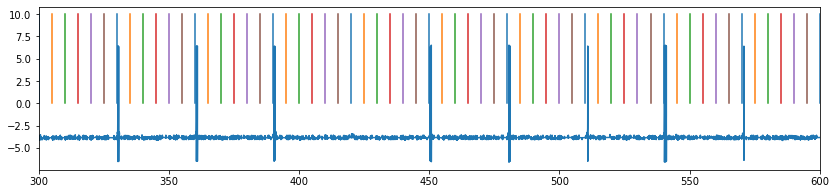

88.0


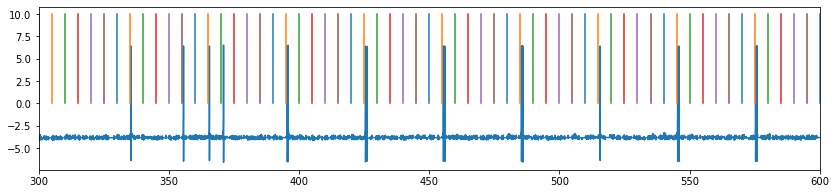

85.0


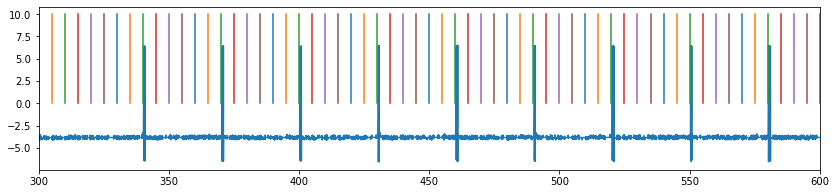

100.0


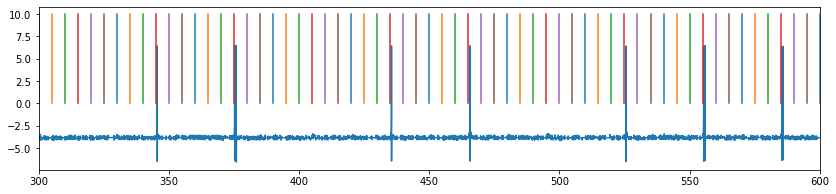

76.0


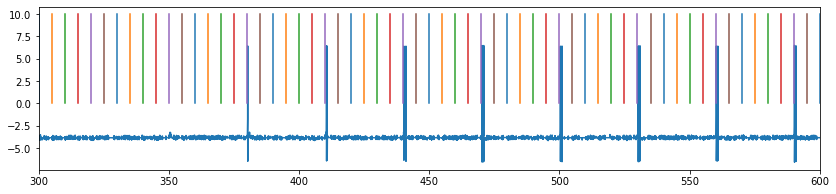

96.0


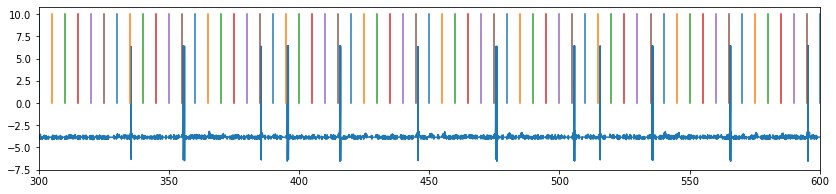

59.0


In [6]:
def measuring_sucess_rate(odor_index):
    ON0=readdata(folder+str(odor_index)+"/ON.txt")

    fig = plt.figure(figsize=(14,3))
    t0=[i * 0.001 for i in range(len(ON0))]
    plt.plot(t0,ON0)
    plt.xlim(homeostasis_duration,homeostasis_duration+300)
    for j in range(int(tmax/5)):
        plt.plot([5*j,5*j],[0,10],color=cmap(j%P))
    plt.show()

    n=(iteration+1)*epoch
    offset=homeostasis_duration #s
    a0=np.zeros(n*P)
    for i,x in enumerate(ON0):
        if i>offset:
            if x>=0 and ON0[i-1]<0 and int((t0[i]-offset)/(5))<n*P:
                a0[int((t0[i]-offset)/(5))]+=1
                
    c0=0
    for k in range(epoch):
        for i in range(iteration):
            f0=0
            f1=0
            for j in range(P):
                if j==odor_index:
                    if a0[(k*(iteration+1)+i+1)*P+j]>0:
                        f0=1
                else:
                    if a0[(k*(iteration+1)+i+1)*P+j]>0:
                        f1=1
            if f0==1 and f1==0:
                c0+=1
            #print(k,i,c0)
    r0=float(c0)/(iteration*epoch)*100
    print(r0)
    return r0
a0=[]
for i in range(P):
    a0.append(measuring_sucess_rate(i))

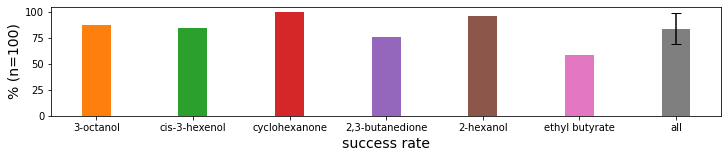

84.0


In [7]:
fig = plt.figure(figsize=(12,2))
w0=0.3
plt.bar("3-octanol",a0[0],color=cmap(1),width=w0)
plt.bar("cis-3-hexenol",a0[1],color=cmap(2),width=w0)
plt.bar("cyclohexanone",a0[2],color=cmap(3),width=w0)
plt.bar("2,3-butanedione",a0[3],color=cmap(4),width=w0)
plt.bar("2-hexanol",a0[4],color=cmap(5),width=w0)
plt.bar("ethyl butyrate",a0[5],color=cmap(6),width=w0)
plt.bar("all",np.average(a0),color=cmap(7),width=w0)
plt.errorbar(["all"],[np.average(a0)], yerr=[statistics.stdev(a0)],fmt='none',ecolor='black',capsize=5)
plt.ylim(0,105)
plt.ylabel("% (n=100)",fontsize=14)
plt.xlabel("success rate",fontsize=14)
plt.savefig("../outputs/figs/OAL_success_rate.svg", format="svg")
plt.show()
print(np.average(a0))

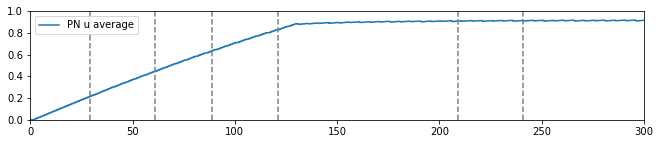

In [8]:
t0=29
t1=61
t2=89
t3=121
t4=209
t5=241
plt.figure(figsize=(11,2))
plt.plot([i * 0.001 for i in range(len(PN_u))],PN_u,label="PN u average")
plt.plot([t0,t0],[0,1],color="gray",linestyle="dashed")
plt.plot([t1,t1],[0,1],color="gray",linestyle="dashed")
plt.plot([t2,t2],[0,1],color="gray",linestyle="dashed")
plt.plot([t3,t3],[0,1],color="gray",linestyle="dashed")
plt.plot([t4,t4],[0,1],color="gray",linestyle="dashed")
plt.plot([t5,t5],[0,1],color="gray",linestyle="dashed")
plt.xlim(0,homeostasis_duration)
plt.ylim(0,1)
plt.legend(loc='upper left')
plt.savefig("../outputs/figs/SFig11a.svg", format="svg",dpi=1200)
print_txt([i * 0.001 for i in range(len(PN_u[0:300000]))],"../outputs/FigSourceData/SFig11a_t.txt")
print_txt(PN_u[0:300000],"../outputs/FigSourceData/SFig11a_u.txt")

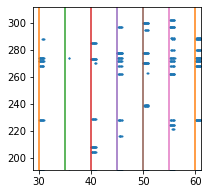

In [9]:
plt.figure(figsize=(3,3))
xmin=t0
xmax=t1
spikes_x_0 = [x for x in spikes_x if xmin <= x < xmax]
spikes_y_0 = [spikes_y[i] for i, x in enumerate(spikes_x) if xmin <= x < xmax]
plt.scatter(spikes_x_0,spikes_y_0,s=1)
plt.xlim(xmin,xmax)
plt.ylim(LN_max,PN_max)
cmap = plt.get_cmap("tab10")
for j in range(int(tmax/5)):
    plt.plot([5*j,5*j],[LN_max,PN_max],color=cmap(j%P+1))
plt.savefig("../outputs/figs/SFig11b0.png", format="png")
print_txt(spikes_x_0 ,"../outputs/FigSourceData/SFig11b0_t.txt")
print_txt(spikes_y_0 ,"../outputs/FigSourceData/SFig11b0_i.txt")

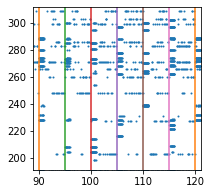

In [10]:
plt.figure(figsize=(3,3))
xmin=t2
xmax=t3
spikes_x_0 = [x for x in spikes_x if xmin <= x < xmax]
spikes_y_0 = [spikes_y[i] for i, x in enumerate(spikes_x) if xmin <= x < xmax]
plt.scatter(spikes_x_0,spikes_y_0,s=1)
plt.xlim(xmin,xmax)
plt.ylim(LN_max,PN_max)
cmap = plt.get_cmap("tab10")
for j in range(int(tmax/5)):
    plt.plot([5*j,5*j],[LN_max,PN_max],color=cmap(j%P+1))
plt.savefig("../outputs/figs/SFig11b1.png", format="png")
print_txt(spikes_x_0 ,"../outputs/FigSourceData/SFig11b1_t.txt")
print_txt(spikes_y_0 ,"../outputs/FigSourceData/SFig11b1_i.txt")

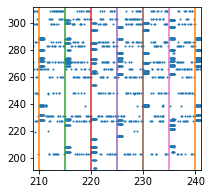

In [11]:
plt.figure(figsize=(3,3))
xmin=t4
xmax=t5
spikes_x_0 = [x for x in spikes_x if xmin <= x < xmax]
spikes_y_0 = [spikes_y[i] for i, x in enumerate(spikes_x) if xmin <= x < xmax]
plt.scatter(spikes_x_0,spikes_y_0,s=1)
plt.xlim(xmin,xmax)
plt.ylim(LN_max,PN_max)
cmap = plt.get_cmap("tab10")
for j in range(int(tmax/5)):
    plt.plot([5*j,5*j],[LN_max,PN_max],color=cmap(j%P+1))
plt.savefig("../outputs/figs/SFig11b2.png", format="png")
print_txt(spikes_x_0 ,"../outputs/FigSourceData/SFig11b2_t.txt")
print_txt(spikes_y_0 ,"../outputs/FigSourceData/SFig11b2_i.txt")